# Solving in python

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Homogeneous case

This is a snippet of how to make the 1D laplacian with N points and spacing dx

[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -1.]]


/Users/samkatiraee-far/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


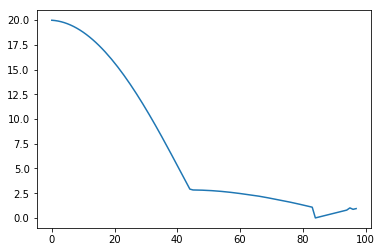

In [103]:
###USED
N = 1000 #number of points
dx = 1  #grid spacing

#Construct a matrix with -2s on the main diagonal and 1s on the 1-off diagonals 
oneD_laplacian = np.eye(N-2,k=-1) - 2*np.eye(N-2) + np.eye(N-2,k=1) 

#For neumann boundary conditions add the line below
oneD_laplacian[0,0] = -1; oneD_laplacian[-1,-1] = -1

#for both Neumann and Dirichlet we still need to divide by dx^2
oneD_laplacian /= dx**2

print(oneD_laplacian)


plt.plot(np.sqrt(vals))


Now choose the coefficients and construct the system matrices

In [104]:
###TO MAKE CODE WORK
#Choose coefficients
c = 5
rho = 2
e = 1
eps = 4

#Construct the system matrices
M_A = -c/rho * oneD_laplacian
M_P = -(c + e**2/eps) * oneD_laplacian

This is a snippet of how to find the radial oscillation frequencies and eigenvectors when we already have the matrices $M_P$ and $M_A$, which denote the homogeneous piezo and acoustic system matrices.

In [105]:
###USED
#Obtain the eigenvalues and eigenvectors
eigvals_A, eigvecs_A = np.linalg.eigh(M_A) #acoustic case
eigvals_P, eigvecs_P = np.linalg.eigh(M_P) #piezo case

#Frequency is the square root of the eigenvalue 
freqs_A = np.sqrt(np.abs(eigvals_A))
freqs_P = np.sqrt(np.abs(eigvals_P))

## Inhomogeneous case

### Acoustic



The parameters 

In [106]:
###USED
#PARAMETERS
N  = 1000              #number of points
dx = 1                #spacing

#Arrays holding coefficient values
c   = np.ones(N)      #stiffness
rho = np.ones(N)      #density

#arbitrarily change the values halfway 
c[N//2:]   = 10 
rho[N//2:] = 1 / 10

construction of the system matrix

In [107]:
###USED
#Function that returns system matrix for coefficient array, spacing, and specified B.C.
def make_system_matrix(coeff_arr, dx, neumann = True):
    a = (coeff_arr[1:] + coeff_arr[:-1]) / 2  #compute weighting coefficient

    main = - a[:-1] - a[1:]   #create main diagonal 
    off  = a[1:-1]            #create off diagonal

    if neumann==True:
        main[0] = -a[1]; main[-1] = -a[-2] #modification for neumann B.C.

    #create system matrix
    system_matrix = 1 / (dx**2) * (np.diag(main, k=0) + np.diag(off,k=1) + np.diag(off,k=-1))
    
    return system_matrix

system_matrix = make_system_matrix(c,dx,neumann=True)

make the right hand side matrix

In [108]:
##USED
#RHS matrix with rho on the diagonal
RHS_matrix = np.diag(-rho[1:-1])

Solve using generalized eigenproblem solver la.eig

In [109]:
##USED
#finding the frequencies and modes
eigvals, eigvecs = la.eig(a = system_matrix, b=RHS_matrix)

#sort the vectors, compute and sort the eigenfrequencies
vecs_sort = eigvecs[:,np.argsort(eigvals)]
freq_sort = np.sort(np.sqrt(eigvals))

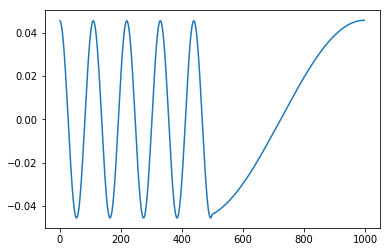

In [110]:
##TO CHECK
plt.plot(vecs_sort[:,10])

### Piezo

In [116]:
e = np.ones(N)     #piezo-electric coefficient
eps = np.ones(N)   #permitivitty
e[N//2:] = 0.2     #inhomogeneous piezo coefficient 

A = make_system_matrix(c,   dx, True)    # Acoustic (u)
B = make_system_matrix(e,   dx, False)   # Cross term, operating on phi
C = make_system_matrix(e,   dx, True)    # Cross term, operating on u
D = make_system_matrix(eps, dx, False)   # Potential (phi)

Now make the block matrix

In [117]:
#Now create the Left hand side block matrix
LHS_matrix = np.block([
        [A , B],
        [C, -D]
    ])
    
#And also the right hand side block matrix
RHS_matrix = np.block([
    [np.diag(-rho[1:-1])        , np.zeros((N-2,N-2))],
    [np.zeros((N-2, N-2)), np.zeros((N-2,N-2))]
])

now solve

In [118]:
#now solve the generalized eigenvalue problem
vals, vecs = la.eig(LHS_matrix,RHS_matrix)

#sort the vectors and values
vecs_sort = vecs[:,np.argsort(vals)]
freq_sort = np.sqrt(np.sort(vals))

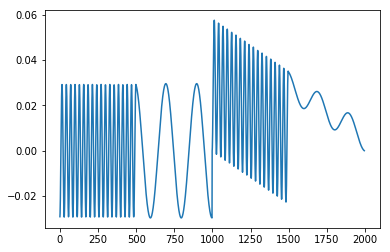

In [119]:
plt.plot(vecs_sort[:, 40])